In [4]:
import pandas
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append("../..")
from write_answer import write_answer

1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у
датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776)
содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую,
используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [6]:
df = pandas.read_csv('gbm-data.csv')
y = df['Activity'].values
X = df.loc[:, 'D1':'D1776'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого
значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

In [10]:
def sigmoid(y_pred):
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    # где y_pred — предсказаное значение.
    return 1.0 / (1.0 + math.exp(-y_pred))

def log_loss_results(model, X, y):
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке
    # на каждой итерации.
    results = []
    for pred in model.staged_decision_function(X):
        results.append(log_loss(y, [sigmoid(y_pred) for y_pred in pred]))

    return results

def plot_loss(learning_rate, test_loss, train_loss):
    # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
    # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и
    # номер итерации, на которой оно достигается.
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('plots/rate_' + str(learning_rate) + '.png')

    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value)
    return min_loss_value, min_loss_index

def model_test(learning_rate):
    model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)

    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    return plot_loss(learning_rate, test_loss, train_loss)

      Iter       Train Loss   Remaining Time 
         1           1.0190            1.43m
         2           0.9192            1.43m
         3           0.8272            1.28m
         4           0.7834            1.21m
         5           0.7109            1.18m
         6           0.6368            1.21m
         7           0.5797            1.20m
         8           0.5610            1.15m
         9           0.5185            1.20m
        10           0.4984            1.16m
        20           0.1999            1.05m
        30           0.1313           56.59s
        40           0.0790           53.39s
        50           0.0511           50.56s
        60           0.0352           50.84s
        70           0.0245           49.34s
        80           0.0162           47.97s
        90           0.0114           46.41s
       100           0.0077           43.86s
       200           0.0004           13.50s
      Iter       Train Loss   Remaining Time 
        

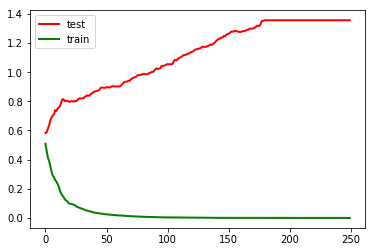

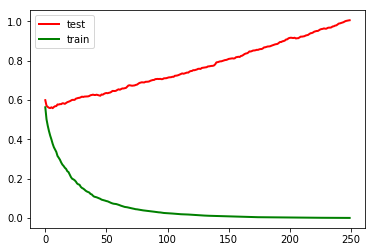

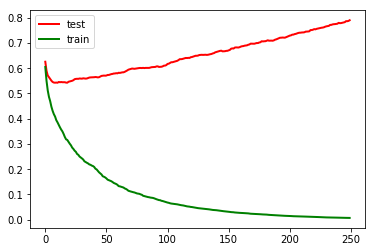

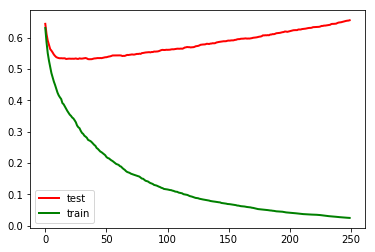

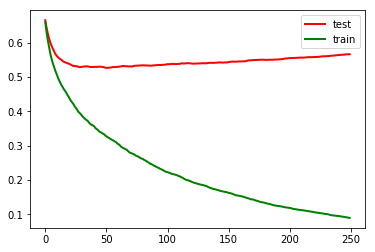

In [11]:
min_loss_results = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    min_loss_results[learning_rate] = model_test(learning_rate)

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации:переобучение
(overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [12]:
write_answer(1, 'overfitting')

Answer 1:  overfitting


4. Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [13]:
min_loss_value, min_loss_index = min_loss_results[0.2]
write_answer(2, '{:0.2f} {}'.format(min_loss_value, min_loss_index))

Answer 2:  0.53 36


5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором
достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными
параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что
предсказания нужно получать с помощью функции predict_proba)

In [14]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
write_answer(3, test_loss)

Answer 3:  0.5415685811957381
